##Import

In [ ]:
import tensorflow as tf
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Conv1D,Embedding,Flatten,GlobalMaxPooling1D, Conv2D, MaxPooling2D

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/yelp_labelled.txt'
df = pd.read_csv(filepath, names=['Review', 'label'], sep='\t')
df

,Review,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


##Preprocessing


In [ ]:
# imdbds['review'] =imdbds['review'].str.lower() 

# labelencoder = LabelEncoder()
# imdbds['sentiment'] = labelencoder.fit_transform(imdbds['sentiment'])

# #Clean Data
# import nltk      
# nltk.download('stopwords')
# from nltk.corpus import stopwords 
# allstopwords=stopwords.words('english')
# imdbds['review']=imdbds['review'].apply(lambda x:" ".join(i for i in x.split() if i not in allstopwords))
# imdbds['review']

# import re
# imdbds['review']=imdbds['review'].apply(lambda x:''.join(re.findall(r'[a-zA-Z+" "]',x)))
# imdbds['review']

##Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
review = df['Review'].values
y=df['label'].values
review_train, review_test, y_train, y_test  = train_test_split(review, y, test_size= 0.25, random_state=1000)


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(review_train)

X_train = vectorizer.transform(review_train)
X_test = vectorizer.transform(review_test)
X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [ ]:
def print_accuracy(model_name):
  loss, accuracy = model_name.evaluate(X_train, y_train,verbose=False )
  print("Training Accuracy : ", format(accuracy))

  loss, accuracy = model_name.evaluate(X_test, y_test,verbose=False)
  print("Test Accuracy : ", format(accuracy))

##Model 1 ANN

In [ ]:
def model1ANN():
  print("Model 1 ANN")
  input_dim = X_train.shape[1]
  model1 = Sequential()
  model1.add(Dense(10, input_dim = input_dim, activation='relu'))
  model1.add(Dense(1, activation='sigmoid'))
  model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model1.fit(X_train, y_train,epochs=10,verbose=False,validation_data=(X_test, y_test),batch_size=10)
  print_accuracy(model1)

In [ ]:
model1ANN()

Model 1 ANN


/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_7/dense_10/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_7/dense_10/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_7/dense_10/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Training Accuracy :  0.9893333315849304
Test Accuracy :  0.7919999957084656


##Model 2 Embedding ANN

In [ ]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(review_train)
X_train = tokenizer.texts_to_sequences(review_train)
X_test = tokenizer.texts_to_sequences(review_test)
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
# print(review_train[500])
# print(X_train[500])
# print(vocab_size)

In [ ]:
def model2():
  print("")
  print("Model 2 Embedding ANN")
  print("")
  embedding_dem = 50
  model2 = Sequential()
  model2.add(Embedding( input_dim = vocab_size,output_dim=embedding_dem,input_length=maxlen))
  model2.add(Flatten())
  model2.add(Dense(10,  activation='relu'))
  model2.add(Dense(1, activation='sigmoid'))
  model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model2.fit(X_train, y_train, epochs=10,verbose=False,validation_data=(X_test, y_test),batch_size=10)
  print_accuracy(model2)

##Model 3 - CNN

In [ ]:
def model3():
  print("")
  print("Model 3 CNN")
  print("")
  ar1=[32,64,128]
  ar2=[3,5,7]
  for i in ar1:
    for j in ar2:
      embedding_dem = 100
      model3 = Sequential()
      model3.add(Embedding( vocab_size, embedding_dem, input_length=maxlen))
      model3.add(Conv1D(i, j, activation='relu'))
      model3.add(GlobalMaxPooling1D())
      model3.add(Dense(10,  activation='relu'))
      model3.add(Dense(1, activation='sigmoid'))
      model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
      model3.fit(X_train, y_train,epochs=50, verbose=False,validation_data=(X_test, y_test),batch_size=10)
      print("Filter : ",i," kernel_size : ",j)
      print_accuracy(model3)

##Model 4 RNN

In [ ]:
def model4():
  print("")
  print("Model 4 RNN")
  print("")
  embedding_dem = 100
  model4 = Sequential()
  model4.add(Embedding( vocab_size, embedding_dem, input_length=maxlen))
  model4.add(SimpleRNN(128,return_sequences=True))
  model4.add(SimpleRNN(128))
  model4.add(Dense(10,activation='relu'))
  model4.add(Dense(1,activation='softmax'))
  model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model4.fit(X_train, y_train,epochs=10,verbose=False,validation_data=(X_test, y_test),batch_size=10)
  print_accuracy(model4)

##Model 5 LSTM

In [ ]:
def model5():
  print("")
  print("Model 5 LSTM")
  print("")
  embedding_dem = 100
  model5 = Sequential()
  model5.add(Embedding( vocab_size, embedding_dem, input_length=maxlen))
  model5.add(LSTM(128,return_sequences=True))
  model5.add(Dropout(0.2))
  model5.add(LSTM(128))
  model5.add(Dense(10,activation='relu'))
  model5.add(Dense(1,activation='softmax'))
  model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model5.fit(X_train, y_train,epochs=10,verbose=False,validation_data=(X_test, y_test),batch_size=10)
  print_accuracy(model5)


##Accuracy

In [ ]:

model2()
model3()
model4()
model5()



Model 2 Embedding ANN

Training Accuracy :  0.5066666603088379
Test Accuracy :  0.47999998927116394

Model 3 CNN

Filter :  32  kernel_size :  3
Training Accuracy :  1.0
Test Accuracy :  0.8119999766349792
Filter :  32  kernel_size :  5
Training Accuracy :  1.0
Test Accuracy :  0.8119999766349792
Filter :  32  kernel_size :  7
Training Accuracy :  0.9973333477973938
Test Accuracy :  0.7559999823570251
Filter :  64  kernel_size :  3
Training Accuracy :  1.0
Test Accuracy :  0.8240000009536743
Filter :  64  kernel_size :  5
Training Accuracy :  1.0
Test Accuracy :  0.7960000038146973
Filter :  64  kernel_size :  7
Training Accuracy :  1.0
Test Accuracy :  0.7960000038146973
Filter :  128  kernel_size :  3
Training Accuracy :  1.0
Test Accuracy :  0.7839999794960022
Filter :  128  kernel_size :  5
Training Accuracy :  1.0
Test Accuracy :  0.7799999713897705
Filter :  128  kernel_size :  7
Training Accuracy :  1.0
Test Accuracy :  0.7960000038146973

Model 4 RNN

Training Accuracy :  0.49

##ImageCNN

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()
print(x_train_full.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)


5


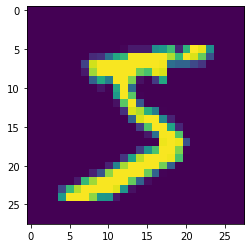

In [ ]:
#show first train and test image
plt.imshow(x_train_full[0])
print(y_train_full[0])

7


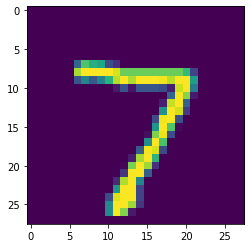

In [ ]:
plt.imshow(x_test[0])
print(y_test[0])

In [ ]:
#find dimension of train and test data
print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
#normalising
x_train_norm = x_train_full/255.
x_test_norm = x_test/255.
#print(x_train_norm[0])
#print(len(x_train_norm[0]))
print(x_train_norm.shape)
print(x_test_norm.shape)


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train = x_train_norm.reshape(-1,28,28,1)   
X_test = x_test_norm.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y_train_full)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_valid, x_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [ ]:
# Building model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) #kernal(filter_intializer for activation)
model.add(Dropout(0.25)) #25% of neurons are removed from the model
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform')) #filter(3,3)
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) # flatting the output from the intput layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))#100 - no of neurons ,classification layer 
model.add(Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history=model.fit(x_train, y_train,epochs=10,verbose=False,validation_data=(x_test, y_test),batch_size=10)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


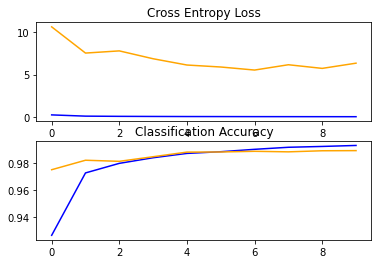

In [ ]:
# plot loss
print(model_history.history.keys())
history_dict= model_history.history
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history_dict['loss'], color='blue', label='train')
plt.plot(history_dict['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history_dict['accuracy'], color='blue', label='train')
plt.plot(history_dict['val_accuracy'], color='orange', label='test')
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 6.3386 - accuracy: 0.9892


[6.338647842407227, 0.9891999959945679]

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(5, shuffle=True, random_state=1)
	# enumerate splits
for train_ix, test_ix in kfold.split(x_train):
  #define model
  model = Sequential()
  model.add(Conv2D(32,(3, 3),activation='relu',kernel_initializer='he_uniform',input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
	# select rows for train and test
  trainX, trainY, testX, testY = x_train[train_ix], y_train[train_ix], x_train[test_ix], y_train[test_ix]
	# fit model
  history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
	# evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
	
		

> 97.891
> 97.755
> 98.018
> 98.091
> 98.055


##Cifar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
cifar =  keras.datasets.cifar10

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar.load_data()
print(x_train.shape)

170498071/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3)


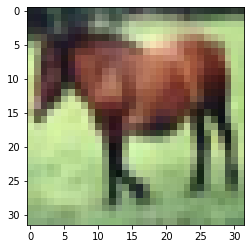

In [ ]:
plt.imshow(x_train[7])

In [ ]:
print(y_test[0])

[3]


In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
x_train_norm = x_train/255
x_test_norm = x_test/255

In [ ]:
x_train_norm.shape

(50000, 32, 32, 3)

In [ ]:
x_train_norm[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_cat_train  = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

Alert: This Will Take very Looooooooooooooooooooong Time to Complete

In [ ]:
model_history = model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test))

Epoch 1/10
1563/1563 [==============================] - 16s 6ms/step - loss: 1.8077 - accuracy: 0.3824 - val_loss: 1.4743 - val_accuracy: 0.4793
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3877 - accuracy: 0.5046 - val_loss: 1.4215 - val_accuracy: 0.4910
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2335 - accuracy: 0.5691 - val_loss: 1.2747 - val_accuracy: 0.5694
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1208 - accuracy: 0.6098 - val_loss: 1.3494 - val_accuracy: 0.5537
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0024 - accuracy: 0.6531 - val_loss: 1.1802 - val_accuracy: 0.6029
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8944 - accuracy: 0.6929 - val_loss: 1.1803 - val_accuracy: 0.6139
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7856 - accuracy: 0.7304 - val_loss: 1.2805 - val_accuracy